# Georgiou AIF

In [1]:
import os
import numpy
from matplotlib import pyplot as plt
from matplotlib.transforms import offset_copy
import csv
import seaborn as sns
import pandas as pd

## Background
The Georgiou AIF is a population AIF derived from DCE data of 39 breast cancer patients in the paper of Georgiou et al. (Magn Reson Med, 2018). The test data is based on the original data submitted with the manuscript (mrm27524-sup-0002-figs2.xlsx)


## Test data

The test data is based on the original data submitted with the manuscript (mrm27524-sup-0002-figs2.xlsx). This data is labeled as 'Original_AIF'. 
In addition AIFs with varying temporal resolutions (0.5, 1, 2, 2.5, 5, 7.5 s) were tested by interpolating the original time curve. 
As we don't expect many errors in implementing the population AIFs, the tolerances were set tight: absolute + relative = 0.0001 mM + 0.01.


## Import data

In [2]:
data_dir = r'../test/results/PopulationAIF_DCE//'
# combine data from CSV files
df = pd.concat([
    pd.read_csv(data_dir + 'TestResults_PopAIF_Georgiou_AIF_PvH_NKI_NL.csv').assign(author='PvH_NKI_NL')])

# label data source
df['source']=''
df.loc[df['label'].str.contains('original'),'source']='original'
df.loc[df['label'].str.contains('temp_res'),'source']='temp_res' 

author_list = df.author.unique()
no_authors = len(author_list)

## Results

### Original AIF

<Figure size 432x288 with 0 Axes>

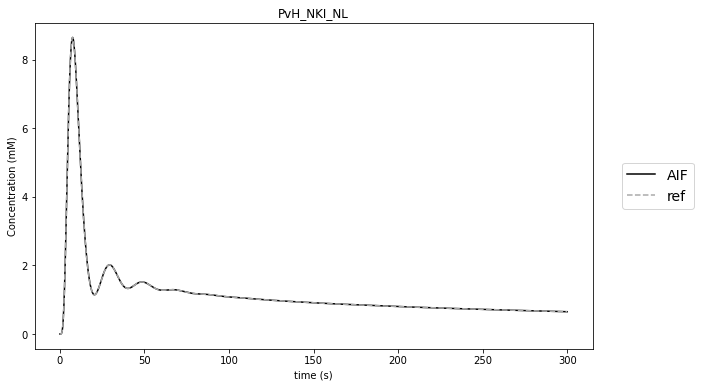

In [3]:
data_original = df[(df['source']=='original')]  

plt.figure()
fig, axs = plt.subplots(1, no_authors, sharey='none',figsize=(10,6))

for current_author in range(no_authors):
    plt.subplot(1,no_authors,current_author+1)
    subset_data = data_original[data_original['author'] == author_list[current_author]]
    plt.plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
    plt.plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')
    
    plt.title(author_list[current_author])
    plt.xlabel('time (s)')
    plt.ylabel('Concentration (mM)')
    

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14)


### Different temporal resolutions

There are no errors for various temporal resolutions  
This test data was added to check whether the contributions can work with temporal resolutions different from the original reference.

<Figure size 432x288 with 0 Axes>

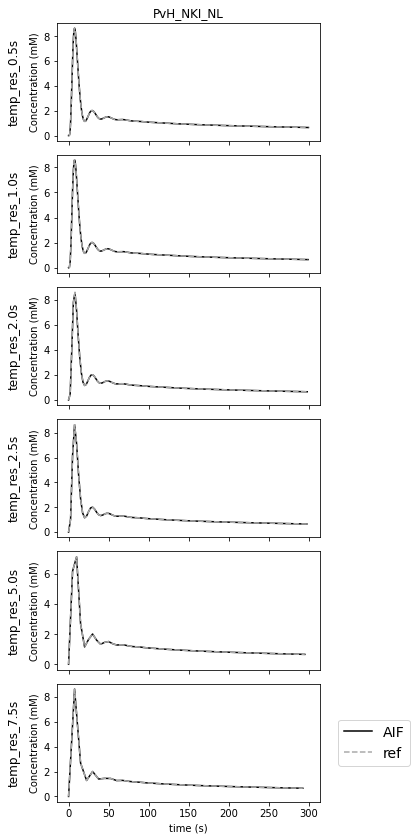

In [4]:
data_res = df[(df['source']=='temp_res')]
res_list = data_res.label.unique()
no_res = len(res_list)

plt.figure()
fig, ax = plt.subplots(no_res, no_authors, sharex='col', sharey='row', figsize=(6,12))


if no_authors > 1:
    for current_res in range(no_res):
        for current_author in range(no_authors):
            subset_data = data_res[(data_res['author'] == author_list[current_author]) & (data_res['label'] == res_list[current_res])]
            ax[current_res,current_author].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
            ax[current_res,current_author].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')

            if current_res == 0:
                ax[current_res,current_author].set_title(author_list[current_author])
            if current_author == 0:
                ax[current_res,current_author].set_ylabel('Concentration (mM)')
            if current_res == no_acq-1:
                ax[current_res,current_author].set_xlabel('time (s)')

        ax[no_res-1,no_authors-1].legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14)
    
    # add extra labels for rows
    pad = 5
    for a, row in zip(ax[:,0], res_list):
        a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)
    
else:
    for current_res in range(no_res):
        subset_data = data_res[(data_res['author'] == author_list[current_author]) & (data_res['label'] == res_list[current_res])]
        ax[current_res].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
        ax[current_res].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')
        ax[current_res].set_ylabel('Concentration (mM)')
        
        if current_res == 0:
            ax[current_res].set_title(author_list[current_author])         
        if current_res == no_res-1:
            ax[current_res].set_xlabel('time (s)')

    ax[no_res-1].legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14)
        
    
    # add extra labels for rows
    pad = 5
    for a, row in zip(ax, res_list):
        a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)
        


fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

## Notes
Additional notes/remarks

### References

Georgiou et al. "A functional form for a representative individual arterial input function measured from a population using high temporal resolution DCE MRI" Magn Reson Med (2018), DOI:  https://doi.org/10.1002/mrm.27524